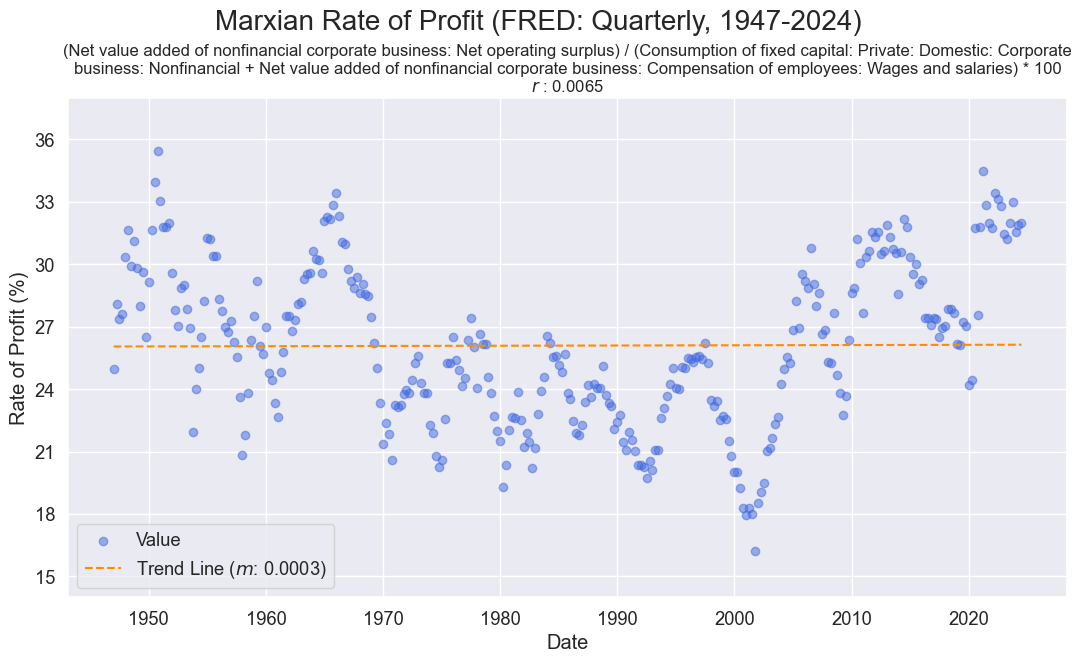

In [ ]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

dates = []
values = []

# https://fred.stlouisfed.org/graph/?graph_id=766456
file_path = 'src/B461RC1Q027SBEA_B456RC1Q027SBEA_W326RC1Q027SBEA.xlsx'  # FRED naming scheme
sheet_name = 'Quarterly'
data = pd.read_excel(file_path, sheet_name=sheet_name)

for index, row in data.iterrows():
    dates.append(np.datetime64(row['observation_date']))
    values.append(float(row['B461RC1Q027SBEA_B456RC1Q027SBEA_W326RC1Q027SBEA'])) # FRED value column 

# linregress conversion date -> numeric
numeric_dates = np.arange(len(dates))
# linregress
slope, intercept, r_value, p_value, std_err = stats.linregress(numeric_dates, values)

# trend line derived from linregress
trend_line = intercept + slope * numeric_dates

#seaborn theme
sns.set_theme(style="darkgrid", font_scale=1.2, rc={"figure.figsize": (15, 7)}) # https://python-charts.com/seaborn/themes/
plt.figure(figsize=(11, 7)) # non-standard size, but latex/ ms word scaling forces my hand

plt.scatter(dates, values, alpha=0.5, label='Value', color='royalblue')
plt.plot(dates, trend_line, color='darkorange', linestyle='--', label=f'Trend Line ($m$: {slope:.4f})')

#suptitle and title take different params: https://stackoverflow.com/questions/1388450/giving-graphs-a-subtitle
plt.suptitle('Marxian Rate of Profit (FRED: Quarterly, 1947-2024)', fontsize=20, y=0.95) # y param to force distance between suptile/title, default spacing looks wrong
plt.title('(Net value added of nonfinancial corporate business: Net operating surplus) / (Consumption of fixed capital: Private: Domestic: Corporate business: Nonfinancial + Net value added of nonfinancial corporate business: Compensation of employees: Wages and salaries) * 100\n'
          f'$r$ : {r_value:.4f}', fontsize=12, wrap=True, x=0.5) #subtitle of a subtitle using linebreak, $$ to look like latex math
        # x param to manually centre title, suptitle and title have different default alignments
plt.xlabel('Date')
plt.ylabel('Rate of Profit (%)')

y_min, y_max = 14, 38 # whilst min() and max() is better practice, introducing a y-axis gap prevents outliers from touching the border
plt.ylim(y_min, y_max)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))  # default float ticks go up in uneven increments

plt.legend(loc='lower left') #however, setting arbitary y_min and y_max makes the auto legend placement look off, so force it to lower left
plt.tight_layout()
plt.savefig('img/marxian_rate_of_profit.png',format='png')